In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
pip install pytorch-lightning --upgrade


In [23]:
pip show pytorch-lightning


Name: pytorch-lightning
Version: 2.1.0
Summary: PyTorch Lightning is the lightweight PyTorch wrapper for ML researchers. Scale your models. Write less boilerplate.
Home-page: https://github.com/Lightning-AI/lightning
Author: Lightning AI et al.
Author-email: pytorch@lightning.ai
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fsspec, lightning-utilities, numpy, packaging, PyYAML, torch, torchmetrics, tqdm, typing-extensions
Required-by: 


In [24]:
!rm -r transformers
!git clone -b upload_detr_no_timm https://github.com/nielsrogge/transformers.git
!cd transformers
!pip install -q ./transformers

rm: cannot remove 'transformers': No such file or directory
Cloning into 'transformers'...
remote: Enumerating objects: 212976, done.
remote: Counting objects: 100% (1641/1641), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 212976 (delta 1079), reused 1450 (delta 940), pack-reused 211335
Receiving objects: 100% (212976/212976), 181.15 MiB | 17.33 MiB/s, done.
Resolving deltas: 100% (159700/159700), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [25]:
!git clone https://github.com/woctezuma/VIA2COCO
%cd VIA2COCO/
!git checkout fixes

Cloning into 'VIA2COCO'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 63 (delta 25), reused 36 (delta 20), pack-reused 20
Receiving objects: 100% (63/63), 16.41 KiB | 1.09 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/VIA2COCO/VIA2COCO/VIA2COCO
Already on 'fixes'
Your branch is up to date with 'origin/fixes'.


In [26]:
import os
import json

# Define the path to the labels folder
labels_folder = "/content/drive/MyDrive/furseal-main/datasets/train/labels"

# Define the path to your images (assuming image dimensions are known)
image_width = 800  # Replace with the actual image width
image_height = 800  # Replace with the actual image height

# Initialize a COCO format dictionary
coco_data = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": [{"id": 1, "name": "object"}]  # You can define your category here
}

# Initialize counters for image and annotation IDs
image_id = 0
annotation_id = 0

# Loop through each text file in the labels folder
for filename in os.listdir(labels_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(labels_folder, filename), "r") as file:
            lines = file.readlines()
            for line in lines:
                # Parse the label information from each line (YOLO format)
                label_info = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, label_info)

                # Convert YOLO format to COCO format
                x = (x_center - width / 2) * image_width
                y = (y_center - height / 2) * image_height
                width *= image_width
                height *= image_height

                # Create a new annotation
                annotation = {
                    "id": annotation_id,
                    "image_id": image_id,
                    "category_id": 1,  # Assuming one category
                    "bbox": [x, y, width, height],
                    "area": width * height,
                    "iscrowd": 0
                }

                coco_data["annotations"].append(annotation)
                annotation_id += 1

        # Create a new image entry
        image_info = {
            "id": image_id,
            "width": image_width,
            "height": image_height,
            "file_name": filename.replace(".txt", ".jpg"),
            "license": 0,
            "flickr_url": "",
            "coco_url": "",
            "date_captured": ""
        }

        coco_data["images"].append(image_info)
        image_id += 1

# Save the combined COCO format JSON file
output_json_file = "trains_combined_labels.json"
with open(output_json_file, "w") as output_file:
    json.dump(coco_data, output_file, indent=4)


In [27]:
import os
import json

# Define the path to the labels folder
labels_folder = "/content/drive/MyDrive/furseal-main/datasets/valid/labels"

# Define the path to your images (assuming image dimensions are known)
image_width = 800  # Replace with the actual image width
image_height = 800  # Replace with the actual image height

# Initialize a COCO format dictionary
coco_data = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": [{"id": 1, "name": "object"}]  # You can define your category here
}

# Initialize counters for image and annotation IDs
image_id = 0
annotation_id = 0

# Loop through each text file in the labels folder
for filename in os.listdir(labels_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(labels_folder, filename), "r") as file:
            lines = file.readlines()
            for line in lines:
                # Parse the label information from each line (YOLO format)
                label_info = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, label_info)

                # Convert YOLO format to COCO format
                x = (x_center - width / 2) * image_width
                y = (y_center - height / 2) * image_height
                width *= image_width
                height *= image_height

                # Create a new annotation
                annotation = {
                    "id": annotation_id,
                    "image_id": image_id,
                    "category_id": 1,  # Assuming one category
                    "bbox": [x, y, width, height],
                    "area": width * height,
                    "iscrowd": 0
                }

                coco_data["annotations"].append(annotation)
                annotation_id += 1

        # Create a new image entry
        image_info = {
            "id": image_id,
            "width": image_width,
            "height": image_height,
            "file_name": filename.replace(".txt", ".jpg"),
            "license": 0,
            "flickr_url": "",
            "coco_url": "",
            "date_captured": ""
        }

        coco_data["images"].append(image_info)
        image_id += 1

# Save the combined COCO format JSON file
output_json_file = "validss_combined_labels.json"
with open(output_json_file, "w") as output_file:
    json.dump(coco_data, output_file, indent=4)


In [28]:
from google.colab import files

# Replace 'combined_labels.json' with the name of your JSON file
files.download('trains_combined_labels.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
from google.colab import files

# Replace 'combined_labels.json' with the name of your JSON file
files.download('validss_combined_labels.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import torchvision
import os

# class CocoDetection(torchvision.datasets.CocoDetection):
#     def __init__(self, root, annFile, processor, train=True):
#         super(CocoDetection, self).__init__(root, annFile)
#         self.processor = processor

#     def __getitem__(self, idx):
#         # read in PIL image and target in COCO format
#         # feel free to add data augmentation here before passing them to the next step
#         img, target = super(CocoDetection, self).__getitem__(idx)

#         # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
#         image_id = self.ids[idx]
#         target = {'image_id': image_id, 'annotations': target}
#         encoding = self.processor(images=img, annotations=target, return_tensors="pt")
#         pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
#         target = encoding["labels"][0] # remove batch dimension

#         return pixel_values, target


In [31]:
# import torchvision

# class CocoDetection(torchvision.datasets.CocoDetection):
#     def __init__(self, root, annFile, processor, train=True):
#         super(CocoDetection, self).__init__(root, annFile)
#         self.processor = processor

#     def __getitem__(self, idx):
#         # read in PIL image and target in COCO format
#         # feel free to add data augmentation here before passing them to the next step
#         img, target = super(CocoDetection, self).__getitem__(idx)

#         # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
#         image_id = self.ids[idx]
#         target = {'image_id': image_id, 'annotations': target}
#         encoding = self.processor(images=img, annotations=target, return_tensors="pt")
#         pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
#         target = encoding["labels"][0] # remove batch dimension

#         return pixel_values, target


In [32]:
class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, root, annFile, processor, train=True):
        super(CocoDetection, self).__init__(root, annFile)
        self.processor = processor

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        # feel free to add data augmentation here before passing them to the next step
        img, target = super(CocoDetection, self).__getitem__(idx)

        # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.processor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
        target = encoding["labels"][0] # remove batch dimension

        return pixel_values, target


In [33]:
from transformers import DetrImageProcessor

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# Define the paths
train_img_folder = '/content/drive/MyDrive/furseal-main/datasets/train/images'
train_ann_file = '/content/trains_combined_labels.json'

valid_img_folder = '/content/drive/MyDrive/furseal-main/datasets/valid/images'
valid_ann_file = '/content/validss_combined_labels.json'

# Create the dataset instances
train_dataset = CocoDetection(root=train_img_folder, annFile=train_ann_file, processor=processor)
val_dataset = CocoDetection(root=valid_img_folder, annFile=valid_ann_file, processor=processor, train=False)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [79]:
train_dataset[0]

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/image_processing_detr.py:886: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


(tensor([[[-2.1179, -1.6213, -0.7137,  ...,  1.5125,  1.5125,  1.5125],
          [-2.1179, -1.6213, -0.7137,  ...,  1.5125,  1.5125,  1.5125],
          [-2.1179, -1.6213, -0.7137,  ...,  1.5125,  1.5125,  1.5125],
          ...,
          [-2.0665, -1.6042, -0.7308,  ...,  1.5810,  1.5810,  1.5810],
          [-1.9467, -1.4329, -0.4739,  ...,  1.5810,  1.5810,  1.5810],
          [-1.8782, -1.3302, -0.3369,  ...,  1.5810,  1.5810,  1.5810]],
 
         [[-2.0357, -1.5280, -0.6001,  ...,  1.6758,  1.6758,  1.6758],
          [-2.0357, -1.5280, -0.6001,  ...,  1.6758,  1.6758,  1.6758],
          [-2.0357, -1.5280, -0.6001,  ...,  1.6758,  1.6758,  1.6758],
          ...,
          [-1.9832, -1.5105, -0.6176,  ...,  1.7458,  1.7458,  1.7458],
          [-1.8606, -1.3354, -0.3550,  ...,  1.7458,  1.7458,  1.7458],
          [-1.7906, -1.2304, -0.2150,  ...,  1.7458,  1.7458,  1.7458]],
 
         [[-1.8044, -1.2990, -0.3753,  ...,  1.8905,  1.8905,  1.8905],
          [-1.8044, -1.2990,

In [34]:
annotations = train_dataset.coco.imgToAnns[image_id]
annotations

[{'id': 14,
  'image_id': 8,
  'category_id': 1,
  'bbox': [119.23076923076925,
   269.2307692307692,
   203.84615384615384,
   167.30769230769232],
  'area': 34105.02958579882,
  'iscrowd': 0}]

In [35]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))

Number of training examples: 84
Number of validation examples: 8


Image n°17


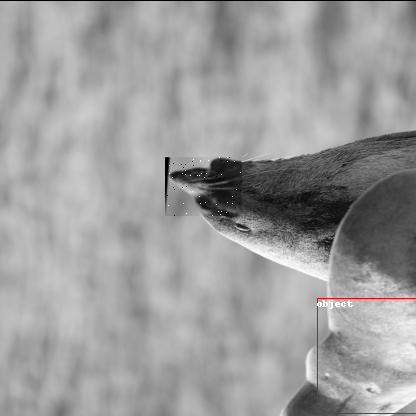

In [71]:
import numpy as np
import os
from PIL import Image, ImageDraw

# based on https://github.com/woctezuma/finetune-detr/blob/master/finetune_detr.ipynb
image_ids = train_dataset.coco.getImgIds()
# let's pick a random image
image_id = image_ids[np.random.randint(0, len(image_ids))]
print('Image n°{}'.format(image_id))
image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join('/content/drive/MyDrive/furseal-main/datasets/train/images', image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image, "RGBA")

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}

for annotation in annotations:
  box = annotation['bbox']
  class_idx = annotation['category_id']
  x,y,w,h = tuple(box)
  draw.rectangle([(x,y),(x+w,y+h)], outline='red', width=1)
  draw.text((x, y), id2label[class_idx], fill='white')

image

In [37]:
annotations

[{'id': 100,
  'image_id': 54,
  'category_id': 1,
  'bbox': [303.84615384615387,
   190.3846153846154,
   84.61538461538461,
   134.6153846153846],
  'area': 11390.532544378697,
  'iscrowd': 0},
 {'id': 101,
  'image_id': 54,
  'category_id': 1,
  'bbox': [269.2307692307692,
   428.8461538461538,
   48.07692307692308,
   63.46153846153846],
  'area': 3051.03550295858,
  'iscrowd': 0},
 {'id': 102,
  'image_id': 54,
  'category_id': 1,
  'bbox': [373.0769230769231,
   373.07692307692315,
   53.84615384615385,
   80.76923076923077],
  'area': 4349.112426035504,
  'iscrowd': 0}]

In [38]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  pixel_values = [item[0] for item in batch]
  encoding = processor.pad(pixel_values, return_tensors="pt")
  labels = [item[1] for item in batch]
  batch = {}
  batch['pixel_values'] = encoding['pixel_values']
  batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = labels
  return batch

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, collate_fn=collate_fn, batch_size=2)
batch = next(iter(train_dataloader))

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/image_processing_detr.py:886: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [39]:
batch.keys()

dict_keys(['pixel_values', 'pixel_mask', 'labels'])

In [40]:
pixel_values, target = train_dataset[0]

In [41]:
pip install pycocotools

In [42]:
pixel_values, target = train_dataset[0]

In [43]:
pixel_values.shape

torch.Size([3, 800, 800])

In [44]:
print(target)

{'size': tensor([800, 800]), 'image_id': tensor([0]), 'class_labels': tensor([1]), 'boxes': tensor([[0.8721, 0.7519, 0.2557, 0.4961]]), 'area': tensor([349580.7188]), 'iscrowd': tensor([0]), 'orig_size': tensor([416, 416])}


In [45]:
import pytorch_lightning as pl
from transformers import DetrConfig, DetrForObjectDetection
import torch

class Detr(pl.LightningModule):
     def __init__(self, lr, lr_backbone, weight_decay):
         super().__init__()
         # replace COCO classification head with custom head
         # we specify the "no_timm" variant here to not rely on the timm library
         # for the convolutional backbone
         self.model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50",
                                                             revision="no_timm",
                                                             num_labels=len(id2label),
                                                             ignore_mismatched_sizes=True)
         # see https://github.com/PyTorchLightning/pytorch-lightning/pull/1896
         self.lr = lr
         self.lr_backbone = lr_backbone
         self.weight_decay = weight_decay

     def forward(self, pixel_values, pixel_mask):
       outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

       return outputs

     def common_step(self, batch, batch_idx):
       pixel_values = batch["pixel_values"]
       pixel_mask = batch["pixel_mask"]
       labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

       outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

       loss = outputs.loss
       loss_dict = outputs.loss_dict

       return loss, loss_dict

     def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        # logs metrics for each training_step,
        # and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
          self.log("train_" + k, v.item())

        return loss

     def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        self.log("validation_loss", loss)
        for k,v in loss_dict.items():
          self.log("validation_" + k, v.item())

        return loss

     def configure_optimizers(self):
        param_dicts = [
              {"params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
              {
                  "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                  "lr": self.lr_backbone,
              },
        ]
        optimizer = torch.optim.AdamW(param_dicts, lr=self.lr,
                                  weight_decay=self.weight_decay)

        return optimizer

     def train_dataloader(self):
        return train_dataloader

     def val_dataloader(self):
        return val_dataloader

In [46]:
# Start tensorboard.
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

<IPython.core.display.Javascript object>

In [47]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

(…)tr-resnet-50/resolve/no_timm/config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([92, 256]) in the checkpoint and torch.Size([2, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
outputs.logits.shape

torch.Size([4, 100, 2])

In [49]:
from pytorch_lightning import Trainer

trainer = Trainer(max_steps=300, gradient_clip_val=0.1)
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                   | Params
-------------------------------------------------
0 | model | DetrForObjectDetection | 41.5 M
-------------------------------------------------
18.0 M    Trainable params
23.5 M    Non-trainable params
41.5 M    Total params
166.007   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/transformers/models/detr/image_processing_detr.py:886: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value o

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=300` reached.


In [50]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch

model = DetrForObjectDetection.from_pretrained("nielsr/detr-finetuned-balloon", id2label={0:"balloon"})
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
processor = DetrImageProcessor.from_pretrained("nielsr/detr-finetuned-balloon")

(…)netuned-balloon/resolve/main/config.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)on/resolve/main/preprocessor_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

In [51]:
!pip install -q coco-eval

  Preparing metadata (setup.py) ... done


In [52]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [53]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

# initialize evaluator with ground truth (gt)
evaluator = CocoEvaluator(coco_gt=val_dataset.coco, iou_types=["bbox"])

print("Running evaluation...")
for idx, batch in enumerate(tqdm(val_dataloader)):
    # get the inputs
    pixel_values = batch["pixel_values"].to(device)
    pixel_mask = batch["pixel_mask"].to(device)
    labels = [{k: v.to(device) for k, v in t.items()} for t in batch["labels"]] # these are in DETR format, resized + normalized

    # forward pass
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    # turn into a list of dictionaries (one item for each example in the batch)
    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

    # provide to metric
    # metric expects a list of dictionaries, each item
    # containing image_id, category_id, bbox and score keys
    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    predictions = prepare_for_coco_detection(predictions)
    evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()

Running evaluation...


  0%|          | 0/4 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

In [54]:
#We can use the image_id in target to know which image it is
pixel_values, target = val_dataset[1]

In [77]:
val_dataset[1][1]

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/image_processing_detr.py:886: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


{'size': tensor([800, 800]), 'image_id': tensor([1]), 'class_labels': tensor([1]), 'boxes': tensor([[0.8664, 0.6795, 0.2673, 0.6333]]), 'area': tensor([185499.3438]), 'iscrowd': tensor([0]), 'orig_size': tensor([416, 416])}

In [55]:
pixel_values = pixel_values.unsqueeze(0).to(device)
print(pixel_values.shape)

torch.Size([1, 3, 800, 800])


In [56]:
with torch.no_grad():
  # forward pass to get class logits and bounding boxes
  outputs = model(pixel_values=pixel_values, pixel_mask=None)
print("Outputs:", outputs.keys())

Outputs: odict_keys(['logits', 'pred_boxes', 'last_hidden_state', 'encoder_last_hidden_state'])


In [74]:
outputs['pred_boxes']

tensor([[[0.1059, 0.7465, 0.1840, 0.4880],
         [0.5514, 0.4379, 0.3184, 0.5159],
         [0.4254, 0.9234, 0.6830, 0.1499],
         [0.5785, 0.3470, 0.3236, 0.3372],
         [0.5641, 0.4454, 0.3613, 0.5324],
         [0.5393, 0.6526, 0.9147, 0.7211],
         [0.5058, 0.9076, 0.5756, 0.1752],
         [0.3372, 0.9547, 0.5535, 0.0886],
         [0.2682, 0.0587, 0.4005, 0.1166],
         [0.5410, 0.5985, 0.8943, 0.8040],
         [0.7596, 0.9461, 0.4260, 0.1039],
         [0.2181, 0.8614, 0.3746, 0.2684],
         [0.5170, 0.6328, 0.9883, 0.6881],
         [0.8228, 0.9211, 0.3236, 0.1500],
         [0.4438, 0.9764, 0.6189, 0.0465],
         [0.5483, 0.5917, 0.8925, 0.8239],
         [0.0788, 0.1099, 0.1360, 0.2131],
         [0.6247, 0.3566, 0.5335, 0.3679],
         [0.7994, 0.8513, 0.3736, 0.2810],
         [0.5649, 0.6046, 0.8280, 0.7160],
         [0.5300, 0.8986, 0.7757, 0.1941],
         [0.7627, 0.8782, 0.4263, 0.2333],
         [0.7834, 0.5334, 0.3778, 0.9974],
         [0

In [57]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

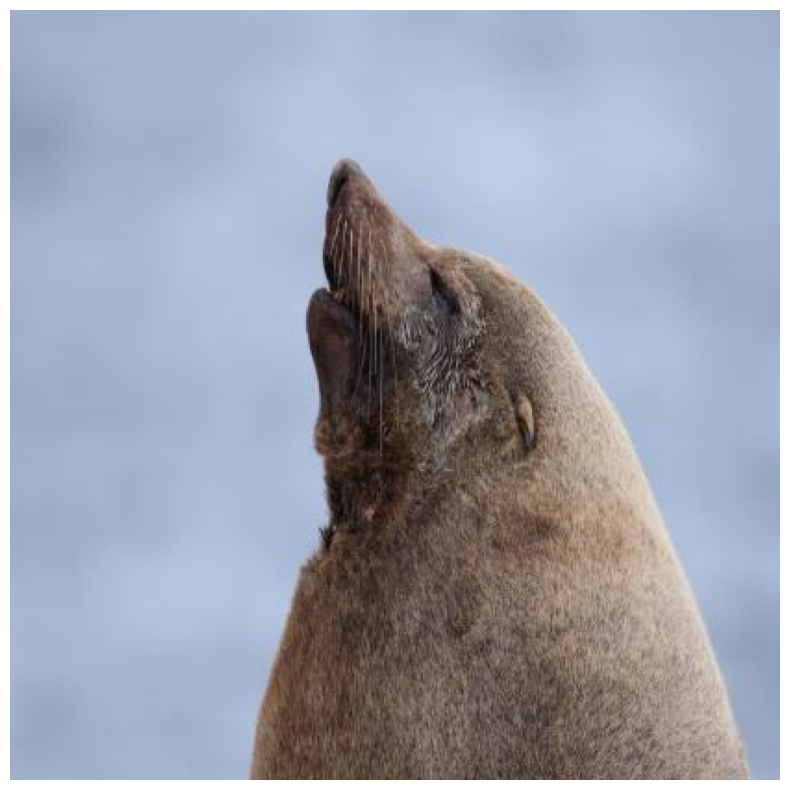

In [58]:
# load image based on ID
image_id = target['image_id'].item()
image = val_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join('/content/drive/MyDrive/furseal-main/datasets/valid/images', image['file_name']))

# postprocess model outputs
width, height = image.size
postprocessed_outputs = processor.post_process_object_detection(outputs,
                                                                target_sizes=[(height, width)],
                                                                threshold=0.9)
results = postprocessed_outputs[0]
plot_results(image, results['scores'], results['labels'], results['boxes'])